# Potato Disease Classification Model

## Import Module
Disini pembuatan modelnya menggunakan Keras

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as K
import matplotlib.pyplot as plt

## Mount Google Drive
Pastikan Link: https://drive.google.com/drive/folders/1cD5paKyz6F3C0W8JPUeH-NTPCaKm1PZm

dibuat shortcutnya di drive masing-masing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd "/content/drive/MyDrive/Tutorial/Tubes/Dataset/Kentang"

/content/drive/MyDrive/Tutorial/Tubes/Dataset/Kentang


## Reading Dataset as ImageFolder
Membaca masing-masing dataset yang displit menjadi 80% Training, 20% Validasi

In [4]:
from tensorflow.keras.utils import image_dataset_from_directory as imageFolder

In [18]:
path = "/content/drive/MyDrive/Tutorial/Tubes/Dataset/Kentang"
train = imageFolder(path, subset="training",validation_split=0.2, seed = 123, image_size=(256, 256))
val =imageFolder(path, subset="validation",validation_split=0.2, seed = 123, image_size=(256, 256))

Found 3000 files belonging to 3 classes.
Using 2400 files for training.
Found 3000 files belonging to 3 classes.
Using 600 files for validation.


In [19]:
class_names = train.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [20]:
class_names = ["Kentang - Early Blight", "Kentang - Late Blight", "Kentang - Healthy"]
class_names

['Kentang - Early Blight', 'Kentang - Late Blight', 'Kentang - Healthy']

In [21]:
plt.figure(figsize=(15, 15))
for images, labels in train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Output hidden; open in https://colab.research.google.com to view.

## Transfer Learning using ResNet50

In [22]:
input_t = K.Input(shape=(256, 256, 3))
pretrained_model = K.applications.ResNet50(include_top = False, weights = "imagenet", input_tensor = input_t)

Beberapa layer terakhir diupdate lagi nilai bobot dan biasnya

Proses ini disebut juga dengan fine-tuning

In [23]:
len(pretrained_model.layers)

175

In [24]:
for layer in pretrained_model.layers[:150]:
  layer.trainable = False

Menambahkan layer fully connected sendiri untuk klasifikasi

In [25]:
model = K.models.Sequential()
#Transfer Learning
model.add(pretrained_model)
#Fully Connected Layer
model.add(K.layers.Flatten())
model.add(K.layers.BatchNormalization())
model.add(K.layers.Dropout(0.2))
model.add(K.layers.Dense(128, activation='relu'))
model.add(K.layers.BatchNormalization())
model.add(K.layers.Dense(3, activation='softmax'))

## Training Model
Digunakan loss function Sparse Categorical Cross Entropy dari Keras dengan Optimizer SGD (learning rate = 0.0005)

In [26]:
opt = K.optimizers.SGD(learning_rate=0.0005)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

history = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
75/75 [==============================] - 73s 896ms/step - loss: 0.3872 - accuracy: 0.8400 - val_loss: 0.2065 - val_accuracy: 0.9200
Epoch 2/20
75/75 [==============================] - 16s 205ms/step - loss: 0.0799 - accuracy: 0.9837 - val_loss: 0.1272 - val_accuracy: 0.9600
Epoch 3/20
75/75 [==============================] - 15s 194ms/step - loss: 0.0513 - accuracy: 0.9896 - val_loss: 0.1063 - val_accuracy: 0.9633
Epoch 4/20
75/75 [==============================] - 15s 192ms/step - loss: 0.0427 - accuracy: 0.9950 - val_loss: 0.0987 - val_accuracy: 0.9683
Epoch 5/20
75/75 [==============================] - 17s 221ms/step - loss: 0.0307 - accuracy: 0.9958 - val_loss: 0.0947 - val_accuracy: 0.9700
Epoch 6/20
75/75 [==============================] - 15s 194ms/step - loss: 0.0301 - accuracy: 0.9962 - val_loss: 0.0900 - val_accuracy: 0.9717
Epoch 7/20
75/75 [==============================] - 15s 196ms/step - loss: 0.0214 - accuracy: 0.9983 - val_loss: 0.0891 - val_accuracy: 0.9700

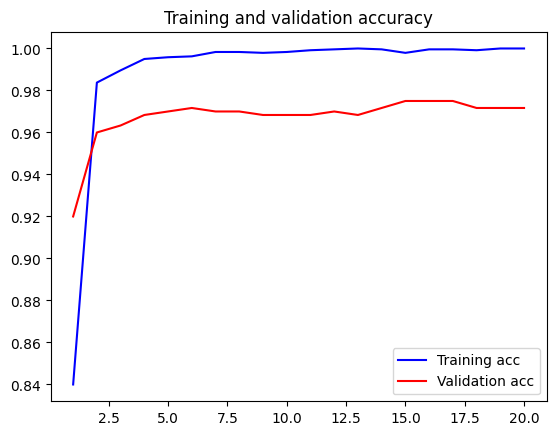

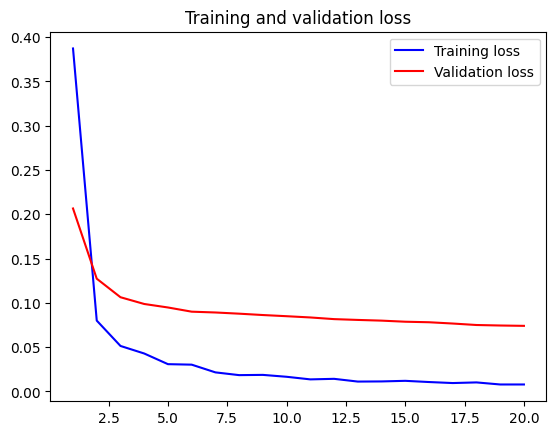

In [27]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Validasi Data

In [28]:
for image_batch, labels_batch in val:
  print(image_batch.shape)
  print(labels_batch.shape)
  break
prediction = model.predict(image_batch)

(32, 256, 256, 3)
(32,)
1/1 [==============================] - 1s 971ms/step


In [29]:
plt.figure(figsize=(15, 15))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  plt.title("Prediksi Model:{0}\nLabel Sebenarnya:{1}".format(class_names[np.argmax(prediction[i])],class_names[labels_batch[i]]), fontsize = 8)
  plt.axis("off")

Output hidden; open in https://colab.research.google.com to view.

## Save Model

In [30]:
model.save("/content/drive/MyDrive/Tutorial/Tubes/Potato_Model.keras")

## Testing with image from google

In [31]:
loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/Tutorial/Tubes/Potato_Model.keras")

In [33]:
image = tf.keras.utils.load_img("/content/Potato.jpg", target_size=(256,256)) # Potato LateBlight
input_arr = tf.keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
np.shape(input_arr)

(1, 256, 256, 3)

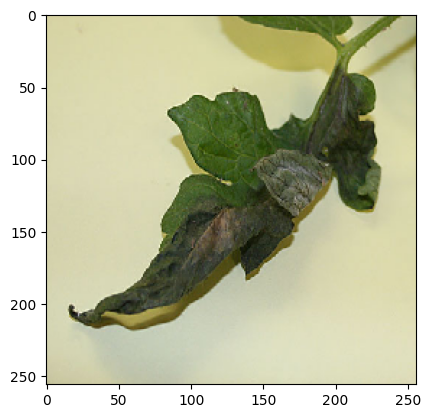

In [34]:
plt.imshow(image)

In [35]:
prediksi = loaded_model.predict(input_arr)

1/1 [==============================] - 2s 2s/step


In [36]:
prediksi

array([[0.3320141 , 0.35507798, 0.31290787]], dtype=float32)

In [37]:
print("Prediksi:", class_names[np.argmax(prediksi)])

Prediksi: Kentang - Late Blight
